Hmm, so first thing import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn import datasets
import pandas as pd

In [ ]:
np.random.seed(5) # Set random seed to 5 for reproduceability

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


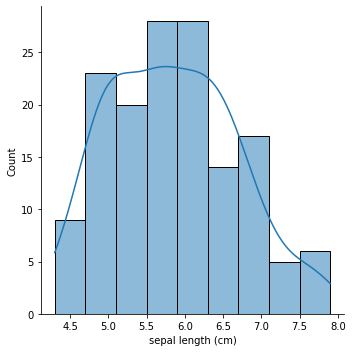

In [ ]:
sns.displot(df['sepal length (cm)'],kde=True)

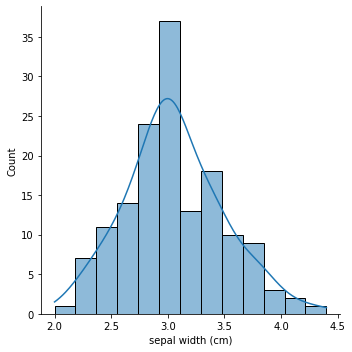

In [ ]:
sns.displot(df['sepal width (cm)'],kde=True)

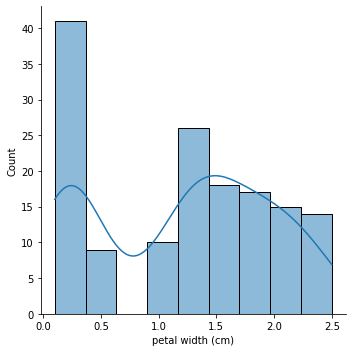

In [ ]:
sns.displot(df['petal width (cm)'],kde=True)

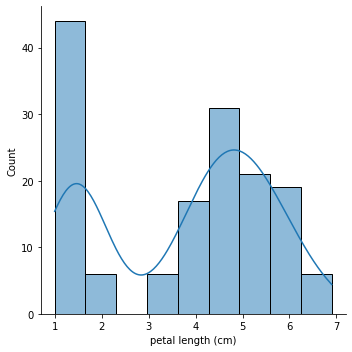

In [ ]:
sns.displot(df['petal length (cm)'],kde=True)

In [ ]:
y=iris.target
X=iris.data

# With MinMaxScaling

In [ ]:
sc=MinMaxScaler()
X_scaled=sc.fit_transform(X)

In [ ]:
km=KMeans(init='k-means++',n_clusters=4)
y_pred=km.fit_predict(X_scaled)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


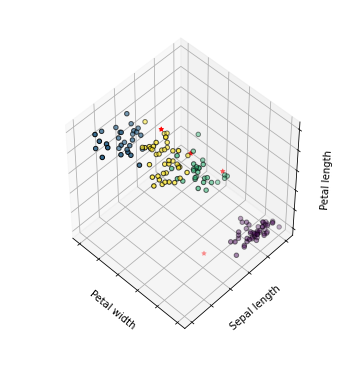

In [ ]:
 fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X_scaled[:, 3], X_scaled[:, 0], X_scaled[:, 2], c=y_pred, edgecolor="k")
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],km.cluster_centers_[:,3],c='red',marker='*')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.dist = 12

# Without Scaling

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


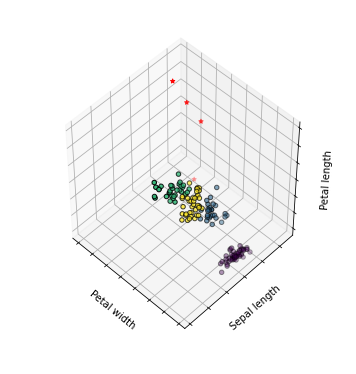

In [ ]:
km=KMeans(init='k-means++',n_clusters=4)
y_pred=km.fit_predict(X)
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y_pred, edgecolor="k")
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],km.cluster_centers_[:,3],c='red',marker='*')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.dist = 12

It is clear we need scale the data as is evident from the features of petal width and petal lengyth distribution plots! as well

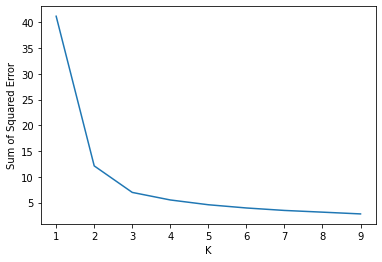

In [ ]:
sse=[]
for k in range(1,10):
  km=KMeans(n_clusters=k)
  km.fit(X_scaled)
  sse.append(km.inertia_)

plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(range(1,10),sse)

# Using n_clusters=3

In [ ]:
km=KMeans(init='k-means++',n_clusters=3,verbose=1,algorithm='full') # Full uses expectation maximization
y_pred=km.fit_predict(X_scaled)

Initialization complete
Iteration 0, inertia 9.937289476647477.
Iteration 1, inertia 7.15792955774824.
Iteration 2, inertia 7.028870209268657.
Iteration 3, inertia 6.9856944927598015.
Iteration 4, inertia 6.982216473785236.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 12.9748047491497.
Iteration 1, inertia 8.042048955594003.
Iteration 2, inertia 7.446002973258956.
Iteration 3, inertia 7.250886853392001.
Iteration 4, inertia 7.190676386622393.
Iteration 5, inertia 7.1772243594533665.
Iteration 6, inertia 7.166769601715199.
Iteration 7, inertia 7.153213936265944.
Iteration 8, inertia 7.135696143980573.
Iteration 9, inertia 7.122750172943851.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 14.03411946820659.
Iteration 1, inertia 8.914276288418293.
Iteration 2, inertia 7.09912127705666.
Iteration 3, inertia 7.015411709821131.
Iteration 4, inertia 6.993813540474772.
Iteration 5, inertia 6.98569449275980

In [ ]:
km.n_clusters

3

In [ ]:
km.n_iter_

5

In [ ]:
km.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [ ]:
km.inertia_

6.982216473785236

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


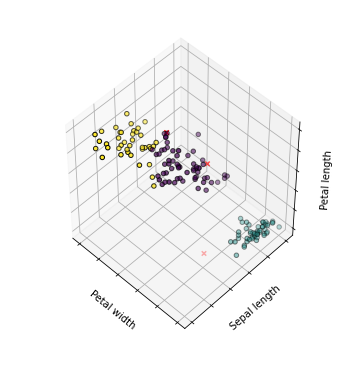

In [ ]:
 fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X_scaled[:, 3], X_scaled[:, 0], X_scaled[:, 2], c=y_pred, edgecolor="k")
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],km.cluster_centers_[:,3],c='red',marker='x')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.dist = 12